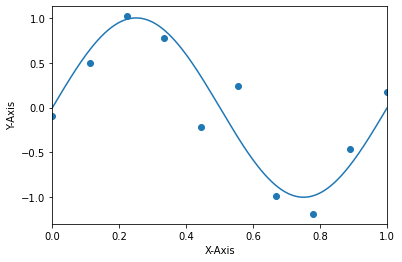

In [14]:
'''

1. Plot 10 samples, spaced uniformly in range [0, 1], with the function sin(2πx) with a 
Gaussian noise 
    
'''

import math 
import random 
import numpy as np
import matplotlib.pyplot as plt

pi = math.pi 

x_list = np.linspace(0,1,10)
y_list = [] 
noise_list = np.random.normal(0,0.25,10)

y_list = np.sin(2*pi*x_list)+noise_list


X = np.linspace(0,1,200)
Y = np.sin(2*pi*X)

plt.plot(X,Y)
plt.scatter(x_list, y_list)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xlim([0, 1])           
plt.show()


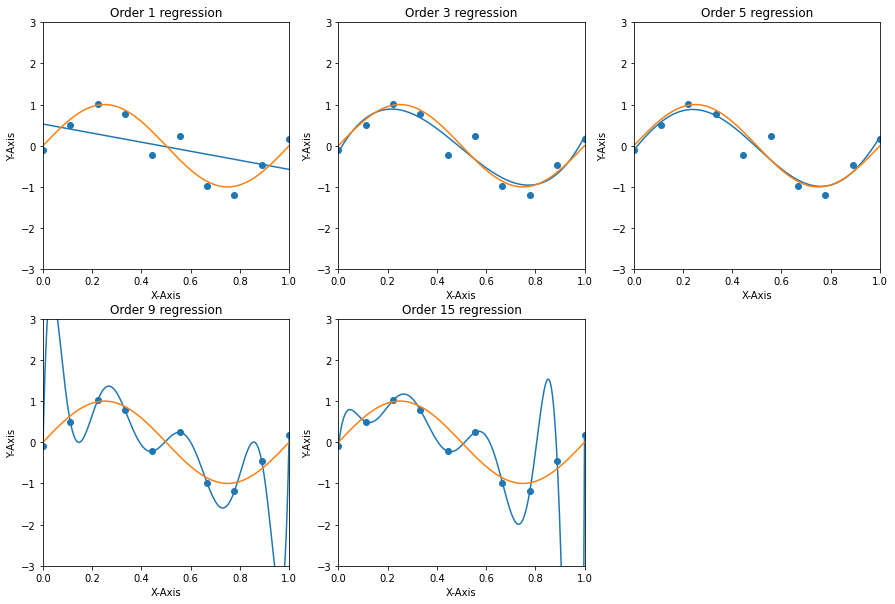

In [15]:

'''

 2. Generate regression lines with polynomial basis function with order 1, 3, 5, 9, and 15.
 
'''

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures


LG = LinearRegression()
plt.figure(figsize = (15,10))

sample = [1,3,5,9,15]
n = 1

xp_list = x_list.reshape((-1,1))
yp_list = y_list

for i in sample:

    plt.subplot(2,3,n)

    poly = PolynomialFeatures(degree=i, include_bias=False)
    fitting_t = poly.fit_transform(xp_list)
    
    LG.fit(fitting_t,yp_list)
    poly_transform = poly.fit_transform(np.linspace(0,1,500).reshape(-1,1))

   
    plt.title("Order "+str(i)+" regression")
    plt.plot(np.linspace(0,1,500),LG.predict(poly_transform))
    plt.plot(X,Y)
    plt.scatter(x_list, y_list)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-3, 3])  
    plt.xlim([0, 1])         
    n+=1 

plt.show()
    

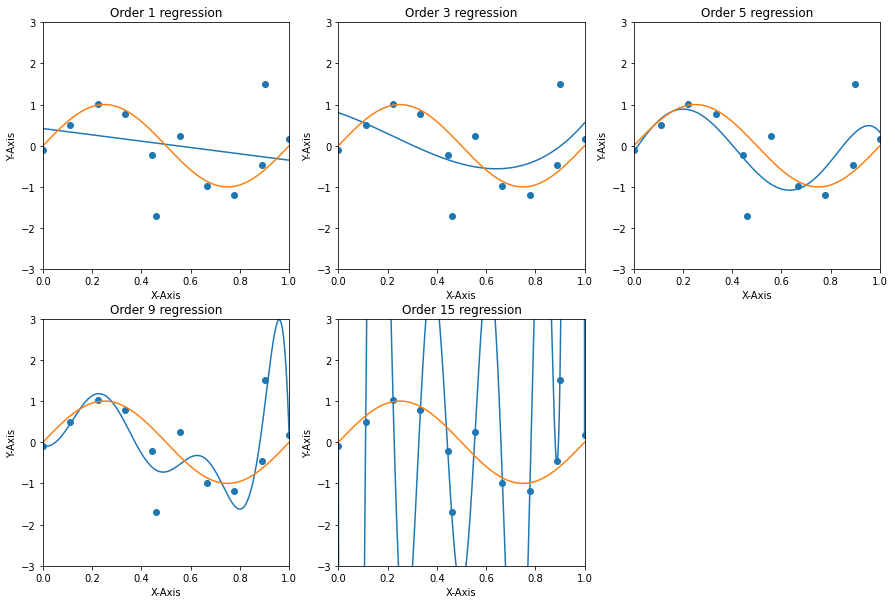

In [16]:
'''

3. Add 2 or 3 points of exceptional outliers that do not follow sin(2πx) and then generate regression lines with
polynomial basis function with order 1, 3, 5, 9, and 15. 

'''
import numpy as np

x_outlier = [-0.28,0.46,0.90]
y_outlier = [1.2,-1.70,1.50]

new_x = np.append(x_list, np.array(x_outlier))
new_y = np.append(y_list, np.array(y_outlier))

plt.figure(figsize = (15,10))
sample = [1,3,5,9,15]
n = 1

xp_list = new_x.reshape((-1,1))
yp_list = new_y

for i in sample:
    
    plt.subplot(2,3,n)
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    fitting_t = poly.fit_transform(xp_list)
    
    LG.fit(fitting_t,yp_list)
    poly_transform = poly.fit_transform(np.linspace(0,1,500).reshape(-1,1))

    plt.title("Order "+str(i)+" regression")
    plt.plot(np.linspace(0,1,500),LG.predict(poly_transform))
    plt.plot(X,Y)
    plt.scatter(new_x, new_y)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-3, 3])  
    plt.xlim([0, 1])         
    n+=1

plt.show()
    




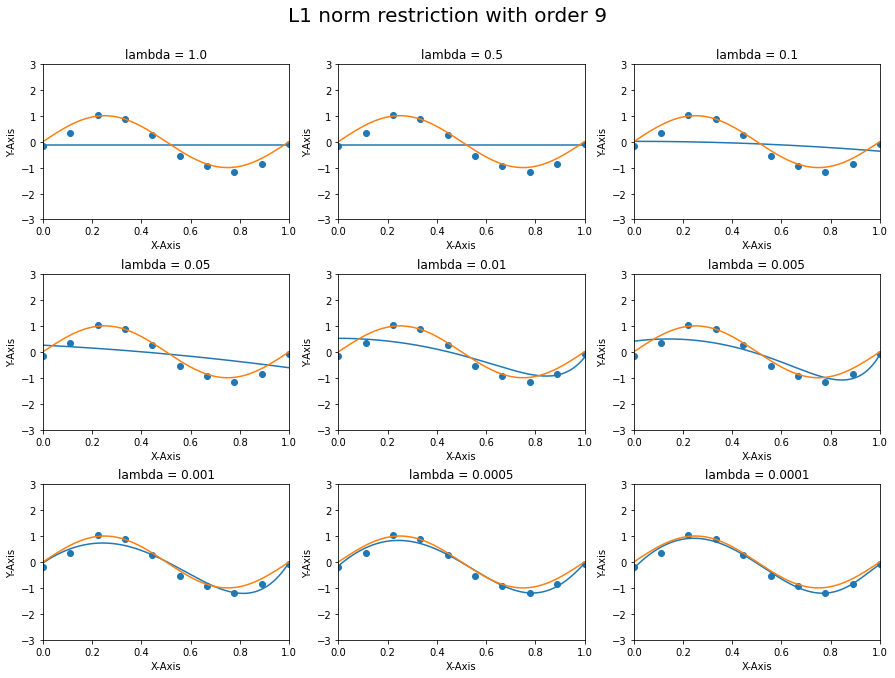

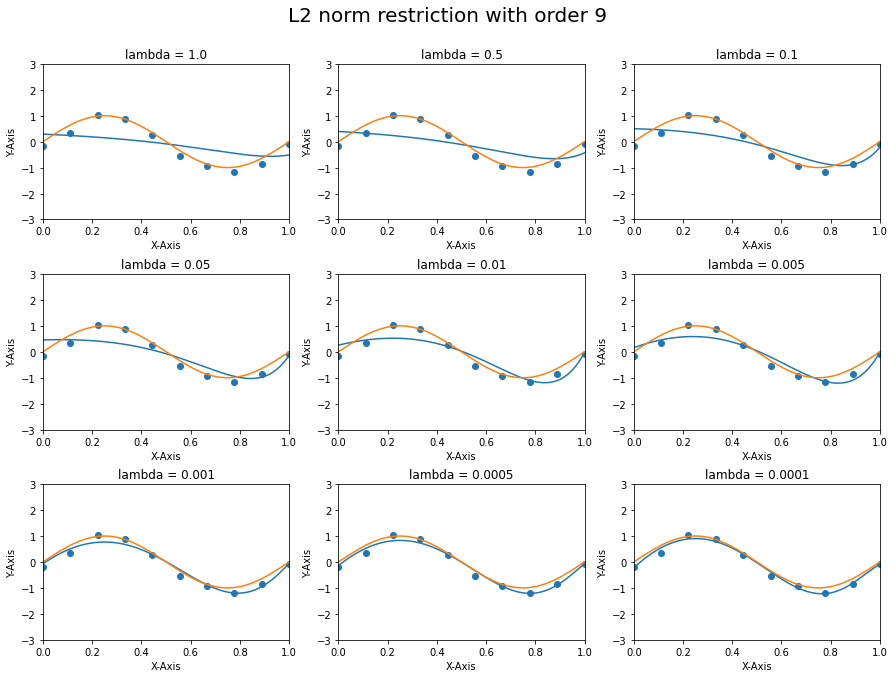

In [74]:
'''

4. For the case including the outliers, generate the regression lines with the L2 regularization
term with order 9 and 15. Show how the lines are changed with respect to λ. Generate the 
regression lines with the L1 regularization term and compare the lines with L2 regularization.

'''

from sklearn.linear_model import Lasso,Ridge

plt.figure(figsize = (15,10))
plt.suptitle('L1 norm restriction with order 9',fontsize=20)

n = 1
lambda_list = [1.0,0.5,0.10,0.05,0.010,0.005,0.001,0.0005,0.0001]

for i in lambda_list:
    
    
    plt.subplot(3,3,n)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    
    xn_list = x_list.reshape((-1,1))
    yn_list = y_list

    poly = PolynomialFeatures(degree=9, include_bias=False)
    fitting_t = poly.fit_transform(xn_list)
    
    lasso = Lasso(alpha = i, max_iter = 100000)
    lasso.fit(fitting_t,yn_list)
    
    poly_transform = poly.fit_transform(np.linspace(0,1,500).reshape(-1,1))
    
    p = str(i)
    plt.title("lambda = "+ p)
    plt.plot(np.linspace(0,1,500),lasso.predict(poly_transform))
    plt.plot(X,Y)
    plt.scatter(x_list, y_list)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-3, 3])  
    plt.xlim([0, 1])         
    n+=1

plt.show()



plt.figure(figsize = (15,10))
plt.suptitle('L2 norm restriction with order 9',fontsize=20)

n = 1

for i in lambda_list:
    
    plt.subplot(3,3,n)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    
    xn_list = x_list.reshape((-1,1))
    yn_list = y_list

    poly = PolynomialFeatures(degree=9, include_bias=False)
    fitting_t = poly.fit_transform(xn_list)
    
    ridge = Ridge(alpha = i, max_iter = 100000)
    ridge.fit(fitting_t,yn_list)
    
    poly_transform = poly.fit_transform(np.linspace(0,1,500).reshape(-1,1))
    
    p = str(i)
    plt.title("lambda = "+ p)
    plt.plot(np.linspace(0,1,500),ridge.predict(poly_transform))
    plt.plot(X,Y)
    plt.scatter(x_list, y_list)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-3, 3])  
    plt.xlim([0, 1])         
    n+=1

plt.show()



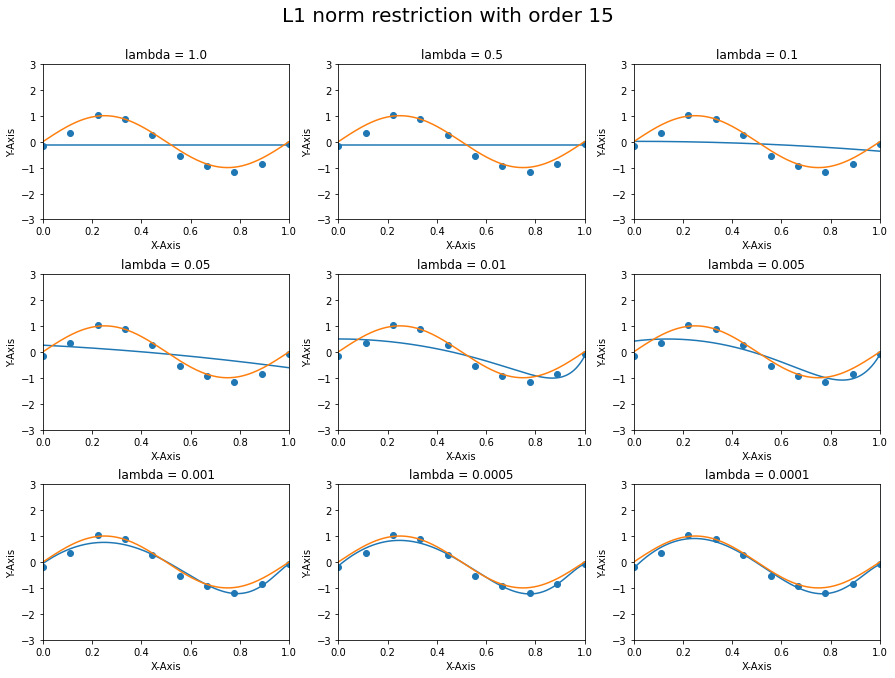

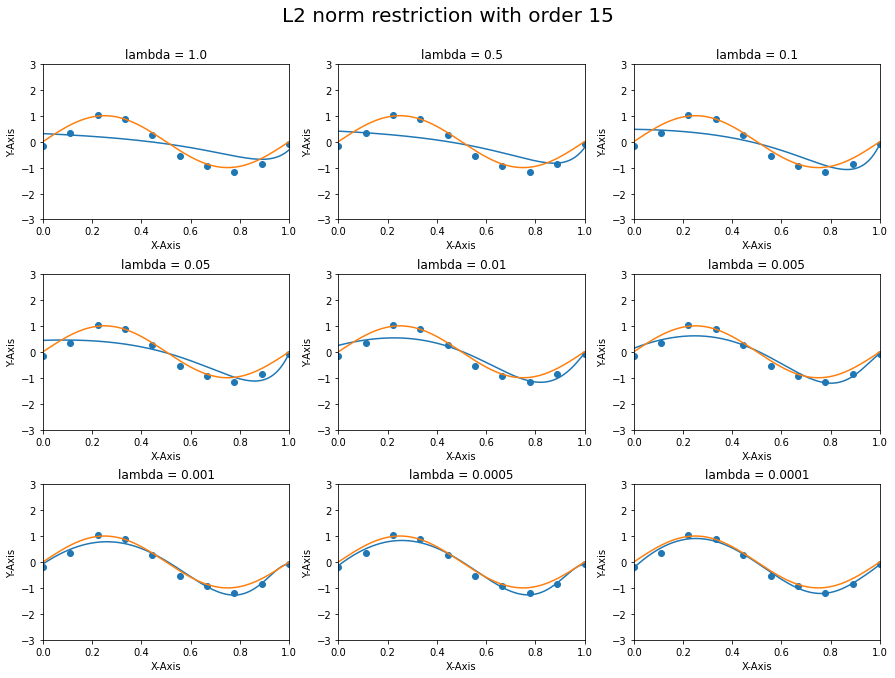

In [75]:

plt.figure(figsize = (15,10))
plt.suptitle('L1 norm restriction with order 15',fontsize=20)

n = 1

for i in lambda_list:
    
    plt.subplot(3,3,n)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    
    xn_list = x_list.reshape((-1,1))
    yn_list = y_list

    poly = PolynomialFeatures(degree=15, include_bias=False)
    fitting_t = poly.fit_transform(xn_list)
    
    lasso = Lasso(alpha = i, max_iter = 100000)
    lasso.fit(fitting_t,yn_list)
    
    poly_transform = poly.fit_transform(np.linspace(0,1,500).reshape(-1,1))
    
    p = str(i)
    plt.title("lambda = "+ p)
    plt.plot(np.linspace(0,1,500),lasso.predict(poly_transform))
    plt.plot(X,Y)
    plt.scatter(x_list, y_list)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-3, 3])  
    plt.xlim([0, 1])         
    n+=1

plt.show()



plt.figure(figsize = (15,10))
plt.suptitle('L2 norm restriction with order 15',fontsize=20)

n = 1

for i in lambda_list:
    
    plt.subplot(3,3,n)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    
    xn_list = x_list.reshape((-1,1))
    yn_list = y_list

    poly = PolynomialFeatures(degree=15, include_bias=False)
    fitting_t = poly.fit_transform(xn_list)
    
    ridge = Ridge(alpha = i, max_iter = 100000)
    ridge.fit(fitting_t,yn_list)
    
    poly_transform = poly.fit_transform(np.linspace(0,1,500).reshape(-1,1))
    
    p = str(i)
    plt.title("lambda = "+ p)
    plt.plot(np.linspace(0,1,500),ridge.predict(poly_transform))
    plt.plot(X,Y)
    plt.scatter(x_list, y_list)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-3, 3])  
    plt.xlim([0, 1])         
    n+=1

plt.show()

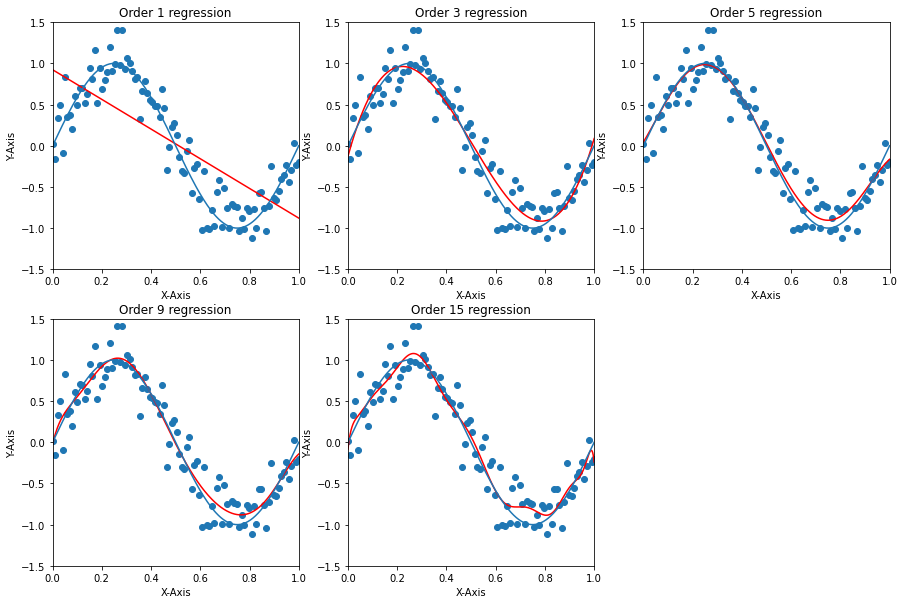

In [13]:
'''

5. Plot 100 samples with the function sin(2πx) instead of 10 samples, and then generate the regression lines with
order 1, 3, 5, 9, and 15. 

'''

x_100 = np.linspace(0,1,100)
noise_list = np.random.normal(0,0.2,100)
y_100 = np.sin(2*pi*x_100)+noise_list

'''plt.plot(X,Y)
plt.scatter(x_100, y_100)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.ylim([-1.5, 1.5])  
plt.xlim([0, 1])         
plt.show()'''


plt.figure(figsize = (15,10))
sample = [1,3,5,9,15]
n = 1

for i in sample:
    xp_list = x_100.reshape((-1,1))
    yp_list = y_100 
    plt.subplot(2,3,n)

    poly = PolynomialFeatures(degree=i, include_bias=False)
    fitting_t = poly.fit_transform(xp_list)
    
    LG.fit(fitting_t,yp_list)
    ploy_transform = poly.fit_transform(np.linspace(0,1,1000).reshape(-1,1))
    
   
    plt.title("Order "+str(i)+" regression")
    plt.plot(np.linspace(0,1,1000),LG.predict(ploy_transform),color='red')
    plt.plot(X,Y)
    plt.scatter(x_100, y_100)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.ylim([-1.5, 1.5])  
    plt.xlim([0, 1])         
    n+=1
plt.show()
    
    
    
    